In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Lab 12: Using the Bootstrap for Estimation
**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your solution.

## Due Date

This assignment is due on **Friday, July 31st, at 11:59PM.**

## Introduction

In this lab, you will examine the bootstrap in greater detail. The goal is to develop a functional approach to bootstrapping any statistic for any sample.

**Collaborators:** *list names here*

In [2]:
# Run this cell to set up your notebook

import seaborn as sns
import csv
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
sns.set()

# from IPython.display import display, Latex, Markdown


## The Bootstrap Procedure

The bootstrap is a very simple process: 
* Sample with replacement from the original sample (now the **bootstrap population**). These samples are called **bootstrap samples**. We typically take thousands of bootstrap samples (~10,000 is common).
* Calculate the statistic of interest for each bootstrap sample. This statistic is called the **bootstrap statistic**, and the empirical distribution of these bootstrap statistics is an approximation to the **sampling distribution** of the bootstrapped statistic.

But why bootstrap instead of just calculating the statistic of interest once on the whole sample? 

Take sample mean estimator as an example. Suppose $\{x_i\}$ are samples coming from an unknown distribution. We can use sample mean $\bar{X} = \frac{1}{n}\sum_{i=1}^n x_i$ to estimate the the mean of the population. However, if we obtain another sample set $\{x_i\}$, we can get very different results. Therefore, computing the sampling distribution (distribution of the sample mean for all possible sample sets) would be very helpful. From such a distribution, we can obtain the variance of the estimator: $E[E(\bar{X})-\bar{X}]^2$.

In order to compute the sampling distribution of $\bar{X}$, we could directly use sampling methods. But that requires us to obtain several different sets of samples $\{x_i\}$ directly from the population. If we have $m$ sets of samples and each set contains $n$ subjects (totaling $m \cdot n$ subjects), we can then use $ \hat{X} = \frac{1}{m}\sum_{j=1}^m \bar{X_j}$ to approximate $E(\bar{X})$, and $\frac{1}{m}\sum_{j=1}^m (\hat{X} - \bar{X_j})^2$ to approximate $E[E(\bar{X})-\bar{X}]^2$.

However, in reality, this is often unfeasible, and we only have one set of samples (**bootstrap population**). Therefore we can use bootstrap method to resample (sample with replacement) from the **bootstrap population** to obtain $m$ different **bootstrap samples**, where each **bootstrap sample** contains the same amount of data as in the **bootstrap population**. Bootstrap samples should have the same amount of data as the bootstrap population when used to estimate the standard error, perform hypothesis testing, or construct confidence intervals. Otherwise, bootstrap samples just need to have an equal (and reasonable) amount of data.

Why do we sample with replacement?
Recall that we are trying to mimic the ideal scenario of directly sampling from the original population. In the case where each bootstrap sample has the same amount of data as the bootstrap population, sampling without replacement would cause every bootstrap sample to be identical to the bootstrap population. Even when the bootstrap samples have less data values than the bootstrap population, sampling without replacement would cause the samples to be *based on the original sample*. Instead, sampling with replacement causes our bootstrap samples to be *based on the distribution of the original sample* (which we assume is representative of the original population).

## Question 1
In this lab, let's use the bootstrap method to estimate the distribution of sample mean and sample standard deviation  of our midterm grades. You will be given a noisy sample of grades from this midterm, which is the **bootstrap population**. You should use **sampling with replacement** to resample from this dataset again and again to obtain **bootstrap samples** and compute the **bootstrap statistic**.

First, write your own sampling function. The function `simple_resample` samples with replacement from the integers 0 through *n-1* and returns an array of length *n*
with the sampled integers. That is, `simple_resample` produces the indices for
a single bootstrap replicate from the bootstrap population.

Use the `numpy.random.randint` function to do the random sampling. 

<!--
BEGIN QUESTION
name: q1
-->

In [3]:
def simple_resample(n):
    """
    Args:
        n: an integer
        
    Returns:
        an array of length n of a random sample with replacement of
        the integers 0, 1, ..., n-1
    """
    return np.random.randint(low=0, high=n, size=n)

simple_resample(10)

array([7, 7, 6, 5, 7, 7, 1, 8, 3, 1])

In [4]:
grader.check("q1")

q1 results: All test cases passed!

## Question 2

### Question 2a

Next, let's write the function `bootstrap` which returns an array of length `replicates`, each entry being the `statistic` of interest computed on a bootstrap sample from the `boot_pop` (bootstrap population).

In our case, the `statistic` could be the `np.mean` or `np.std` function, and the `resample` could be `simple_resample`. Here we leave them as parameters so that we can switch to other statistic and resample functions later.

For each bootstrap sample, you should first use `resample` to obtain samples from the `boot_pop`, then compute the statistic of those samples using the `statistic` method, and put it into your result.

<!--
BEGIN QUESTION
name: q2a
-->

In [5]:
def bootstrap(boot_pop, statistic, resample, replicates = 1000):
    """
    Args:
        boot_pop: an array of shape n x d.
        statistic: a function which takes boot_pop and returns a number or array (in the case where we are estimating multiple parameters at once).
        resample: a function which takes n and returns a random sample from the integers [0, n)
        replicates: the number of resamples
        
    Returns:
        an array of length replicates, each entry being the statistic computed on a bootstrap sample of the data.
    """
    n = len(boot_pop)
    return np.array([statistic(boot_pop[resample(n)]) for i in range(replicates)])

In [6]:
grader.check("q2a")

q2a results: All test cases passed!

Now let's use the bootstrap function to compute the distribution of the sample mean for the midterm grade.

First, let's load the data.

In [7]:
grades = pd.read_csv("grades_sample.csv")
grades.head()

,Grade
0,70.652174
1,85.418495
2,84.909697
3,55.759027
4,75.008190


/Users/huangweijun/anaconda/envs/cs188/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


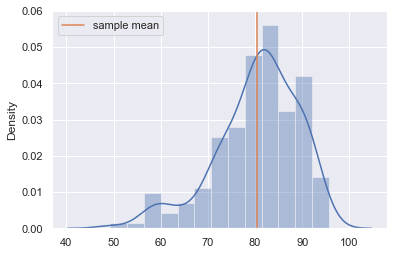

In [8]:
sns.distplot(grades);
plt.plot([np.mean(grades), np.mean(grades)], [0, 0.07], label = 'sample mean')
plt.ylim(0, 0.06)
plt.legend();

### Question 2b

Now, use the right parameters to call our `bootstrap` method to obtain the sample mean $\bar{X}$ for $m$ different bootstrap samples $\{x_i\}$. NOTE: Re-running the below cell will give us a different mean and variance each time (Why?).

<!--
BEGIN QUESTION
name: q2b
-->

mean of bootstrap mean: 80.44088716258993 
variance of bootstrap mean: 0.3632190810256606


/Users/huangweijun/anaconda/envs/cs188/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


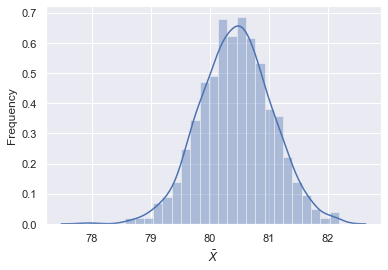

In [11]:
m = 1000  # the number of resamples 
boot_pop = np.array(grades["Grade"])

boot_sample_means = bootstrap(boot_pop, np.mean, simple_resample, m)

boot_mean_mean = np.mean(boot_sample_means)
boot_var_mean = np.var(boot_sample_means)
print('mean of bootstrap mean:', boot_mean_mean, '\nvariance of bootstrap mean:', boot_var_mean)
sns.distplot(boot_sample_means)
plt.xlabel(r"$\bar{X}$")
plt.ylabel("Frequency");

In [12]:
grader.check("q2b")

q2b results: All test cases passed!

### Question 2c

Now, use the right parameters to call our `bootstrap` method to obtain the standard deviation $\sqrt{\frac{1}{n}\sum_{i=1}^{n} (x_i-\bar{X})^2}$ for $m$ different bootstrap samples $\{x_i\}$. You should use `np.std`

<!--
BEGIN QUESTION
name: q2c
-->

mean of bootstrap std: 8.71406764437079 
variance of bootstrap std: 0.24308018922294086


/Users/huangweijun/anaconda/envs/cs188/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


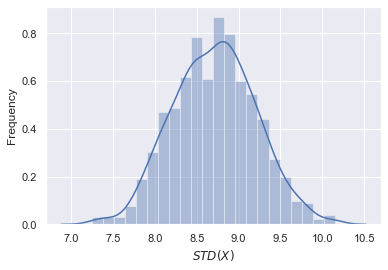

In [13]:
m = 1000
boot_pop = np.array(grades["Grade"])

boot_sample_std = bootstrap(boot_pop, np.std, simple_resample, m)

boot_mean_std = np.mean(boot_sample_std)
boot_var_std = np.var(boot_sample_std)
print('mean of bootstrap std:', boot_mean_std, '\nvariance of bootstrap std:', boot_var_std)
sns.distplot(boot_sample_std)
plt.xlabel(r"$STD(X)$")
plt.ylabel("Frequency");

In [14]:
grader.check("q2c")

q2c results: All test cases passed!

The true mean for the midterm grade is 80.1, and the standard deviation is 9.20.
Compare your results with them.

## Question 3
Now let's use the bootstrap method to analyze more sophisticated estimators – the coefficients of linear models.

Let's use the `mpg` dataset from seaborn, that we looked at in an earlier lab.

In [15]:
mpg = sns.load_dataset('mpg')
mpg = mpg.dropna()
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Let's start by looking at the relationship between `horsepower` and `mpg`.

/Users/huangweijun/anaconda/envs/cs188/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


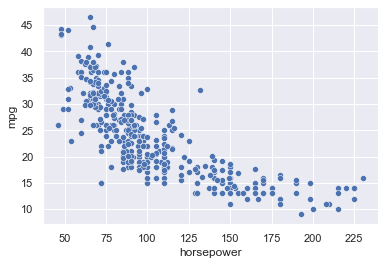

In [16]:
sns.scatterplot(mpg['horsepower'], mpg['mpg']);

It should be clear that a line of best fit going through these points would not pass through the origin, but for the sake of simplicity, let's start by building a simple linear model **without an intercept term** to model `mpg` as a function of `horsepower`. We will assume there is some true slope $\theta^*$ that we are trying to estimate, such that

$$\text{mpg} = \theta^* \cdot \text{horsepower}$$

Our prediction for `mpg` is then

$$\hat{\text{mpg}} = \theta \cdot \text{horsepower}$$

In Homework 5, you showed that the value of $\hat{\theta}$ that minimized average squared loss for this model was 

$${\hat{\theta}} = \frac{\sum x_iy_i}{\sum x_i^2}$$

We say that the above $\hat{\theta}$ is the **least squares estimator** for $\theta^*$.

### Question 3a

Below, implement the function `single_parameter_estimator`, which takes in a dataset `d` and returns the least squares estimate for $\theta^*$ defined above.

Note that in order to perform the bootstrap, we need to combine `x`, `y` into a $n \times 2$ array `d`. So `d[:,0]` is equivalent to `x`, and `d[:,1]` is equivalent to `y`.

<!--
BEGIN QUESTION
name: q3a
-->

In [18]:
def single_parameter_estimator(d):
    """
    Args:
        d: A n*2 array which contains x and y. d[:,0] would be x, d[:,1] would be y.
        
    Returns:
        The optimal theta that minimizes average squared loss for this dataset and model
        .
    """
    return np.sum(d[:,0]@d[:,1])/np.sum(d[:,0]**2)
data_3a = mpg[['horsepower', 'mpg']].values
single_parameter_estimator(data_3a)

0.1788398369210322

In [19]:
grader.check("q3a")

q3a results: All test cases passed!

Now, we can use our previous `bootstrap` function to obtain different estimated $\theta$:

In [20]:
replicates = 1000

boot_theta = bootstrap(data_3a, single_parameter_estimator, simple_resample, replicates)

boot_theta_mean = np.mean(boot_theta)
boot_theta_var = np.var(boot_theta)
print('mean of bootstrap theta:', boot_theta_mean, '\nvariance of bootstrap theta:', boot_theta_var)

mean of bootstrap theta: 0.17927693047658613 
variance of bootstrap theta: 4.608104808314296e-05


Finally, let's plot the distribution of `boot_theta`.

/Users/huangweijun/anaconda/envs/cs188/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


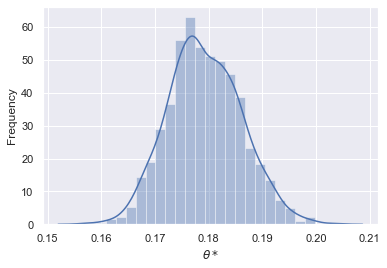

In [21]:
sns.distplot(boot_theta);
plt.xlabel(r"$\theta*$")
plt.ylabel("Frequency");

### Question 3b

As we saw in lecture, we can extend this procedure to a linear model with any number of coefficients. Let's now suppose we are trying to model `mpg` as a linear function of `horsepower`, `weight`, and `acceleration`, that contains an intercept term. We are looking to estimate $\theta_0^*, \theta_1^*, \theta_2^*,$ and $\theta_3^*$ in

$$\text{mpg} = \theta_0^* + \theta_1^* \cdot \text{horsepower} + \theta_2^* \cdot \text{weight} + \theta_3^* \cdot \text{acceleration} + \epsilon$$

Note that this model makes predictions as $\text{predicted mpg} = \hat{\theta_0} + \hat{\theta_1} \cdot \text{horsepower} + \hat{\theta_2} \cdot \text{weight} + \hat{\theta_3} \cdot \text{acceleration}$; this is really nothing new.


If we want to bootstrap the sampling distribution of the estimators of multiple coefficients, it's probably best to use `scikit-learn`'s `LinearRegression` package to determine what the least squares estimates of our parameters are. Here's how we _could have_ written the `single_parameter_estimator` function above, using `scikit-learn` instead of hard-coding the optimal $\hat{\theta}$:

```py
def single_parameter_estimator_sk(d):
    """
    Args:
        d: A n*2 array which contains x and y. d[:,0] would be x, d[:,1] would be y.
        
    Returns:
        The optimal theta that minimizes average squared loss for this dataset and model
        .
    """
    model = lm.LinearRegression(fit_intercept = False)
    model.fit(d[:, 0].reshape(-1, 1), d[:, 1])
    return model.coef_[0]
```

Below, fill in the code for `four_parameter_estimator(d)`, that takes in a dataset `d` that has the same number of rows as the `mpg` dataset, and 4 columns (one each for `horsepower`, `acceleration`, `weight`, and `mpg`). It should return an **array** with 4 elements – the least squares estimates for all four model parameters (i.e. the model parameters that minimize average squared loss for this dataset).

To be explicit, the parameters we're solving for are the intercept term and the slopes on `horsepower`, `acceleration`, and `weight`. 

HINT: Try using `model.intercept_` and `model.coef_`.

<!--
BEGIN QUESTION
name: q3b
-->

In [60]:
def four_parameter_estimator(d):
    """
    Args:
        d: A n*4 array which contains X and y. 
        d[:, :3] contains our design matrix X, 
        d[:, 3] contains our true response values y.

    Returns:
        The optimal theta that minimizes average squared loss for this dataset and model
        .
    """
    model = lm.LinearRegression(fit_intercept=True)
    model.fit(d[:,:3], d[:,3])
    return np.append(model.intercept_, model.coef_)

data_3b = mpg[['horsepower', 'weight', 'acceleration', 'mpg']].values
four_parameter_estimator(data_3b)

array([ 4.56782929e+01, -4.74956153e-02, -5.78940259e-03, -2.06565785e-03])

In [65]:
grader.check("q3b")

q3b results: All test cases passed!

Now, it's time to use our `bootstrap` method to compute the estimated sampling distribution for all four of our parameters. Observe what happens when we call `bootstrap(data_3b, four_parameter_estimator, simple_resample, replicates)`:

In [62]:
bootstrap_multiple = bootstrap(data_3b, four_parameter_estimator, simple_resample, replicates)
bootstrap_multiple

array([[ 4.48708797e+01, -5.43118383e-02, -5.31713038e-03,
        -1.11217131e-02],
       [ 4.40439816e+01, -4.47075711e-02, -6.10669820e-03,
         1.68485632e-01],
       [ 4.22617986e+01, -5.59428388e-02, -5.03153310e-03,
         1.28224829e-01],
       ...,
       [ 4.49530876e+01, -7.91268415e-02, -4.80044970e-03,
         6.63989365e-02],
       [ 4.68007488e+01, -4.77275186e-02, -5.73634597e-03,
        -8.38353453e-02],
       [ 4.86572179e+01, -4.77285765e-02, -5.94683556e-03,
        -1.61087770e-01]])

In [63]:
bootstrap_multiple.shape

(1000, 4)

In previous questions, the result of calling `bootstrap` was an array of length `replicates`. However, now it is a matrix of size `(replicates, 4)` since for each bootstrap resample, we are estimating four parameters, not one.

In `bootstrap_multiple`, column `i` contains the estimated values of $\theta_i^*$.

Below, we display a plot with the bootstrapped sampling distributions of all four parameter estimates.

/Users/huangweijun/anaconda/envs/cs188/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/huangweijun/anaconda/envs/cs188/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/huangweijun/anaconda/envs/cs188/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

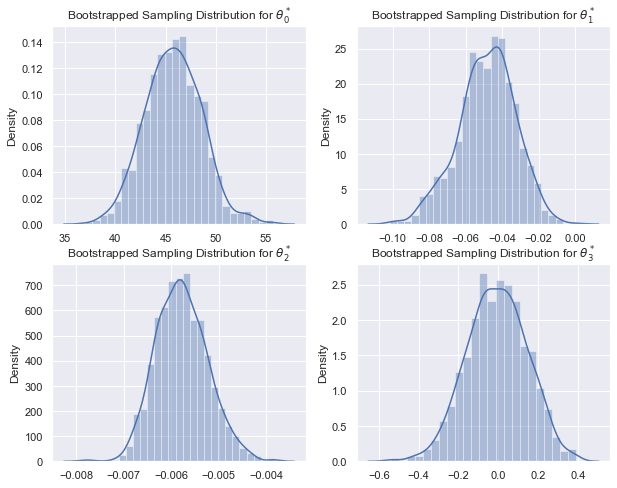

In [64]:
f, axs = plt.subplots(2,2,figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title(r'Bootstrapped Sampling Distribution for $\theta_{}^*$'.format(i))
    sns.distplot(bootstrap_multiple[:, i])

### Question 3c

Recall, we can use bootstrapped parameter estimates to create confidence intervals for the true model parameters.

Let's focus on the bootstrapped estimates for $\theta_3^*$, since they happen to be the most interesting. Below, set `left_endpt` and `right_endpt` to be the left and right endpoints for a **95% confidence interval** for the value of $\theta_3^*$.
- Hint: You will need to use `np.percentile`.

<!--
BEGIN QUESTION
name: q3c
-->

In [70]:
left_endpt = np.percentile(bootstrap_multiple[:, 3], 2.5)
right_endpt = np.percentile(bootstrap_multiple[:, 3], 97.5)

left_endpt, right_endpt

(-0.3018572986070356, 0.27292327092480223)

In [71]:
grader.check("q3c")

q3c results: All test cases passed!

Below, we plot your confidence interval along with the distribution of bootstrapped estimates for $\theta_3^*$.

/Users/huangweijun/anaconda/envs/cs188/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


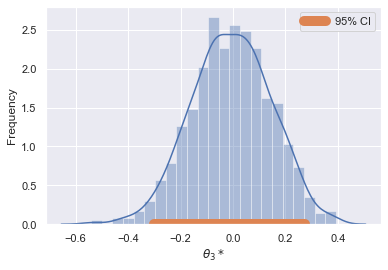

In [72]:
sns.distplot(bootstrap_multiple[:, 3]);
plt.plot([left_endpt, right_endpt], [0, 0], linewidth = 10, label = '95% CI');
plt.legend();
plt.xlabel(r"$\theta_3*$")
plt.ylabel("Frequency");

If you did Question 3c correctly, you should notice that 0 is in the confidence interval for $\theta_3^*$. Since this is the case, we would say we don't have enough evidence to reject the claim that the true slope is 0, i.e. that `weight` does not help explain `mpg` in a linear model.

## Question 4

That seems to be a little strange. Intuitively, we'd think the weight of a car impacts its fuel economy. So why is it that the slope for weight in the previous question was found to be not significantly different than 0? Let's explore.

Firstly, let's look at a scatter plot between `weight` and `mpg`:

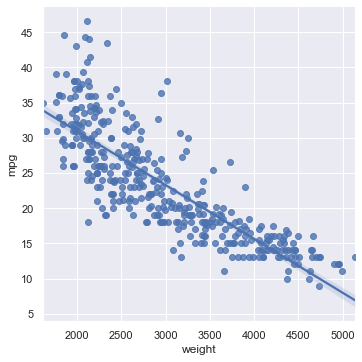

In [73]:
sns.lmplot(data = mpg,
           x = 'weight', 
           y = 'mpg');

We can see that they are quite strongly negatively correlated:

In [74]:
mpg[['weight', 'mpg']].corr()

,weight,mpg
weight,1.000000,-0.832244
mpg,-0.832244,1.000000


This means, at the very least, that `weight` should provide some explanatory power when predicting `mpg`. So why was 0 in the confidence interval for the true slope on `weight` in the previous question?

Let's dig a little deeper. Let's look at the correlation between `horsepower`, `acceleration`, and `weight`.

In [75]:
mpg[['horsepower', 'acceleration', 'weight']].corr()

,horsepower,acceleration,weight
horsepower,1.000000,-0.689196,0.864538
acceleration,-0.689196,1.000000,-0.416839
weight,0.864538,-0.416839,1.000000


### Question 4a

What do you notice above? What does this have to do with 0 being in the 95% confidence interval for $\theta_3^*$ above?

<!--
BEGIN QUESTION
name: q4a
-->

_Type your answer here, replacing this text._

### Question 4b

Let's now create a `two_parameter_estimator` that returns the estimates for the intercept and slope for the following model:

$$\text{mpg} = \theta_0^* + \theta_1^* \cdot \text{weight} + \epsilon$$

In [80]:
# This code is already filled in for you
def two_parameter_estimator(d):
    """
    Args:
        d: A n*2 array which contains X and y. 
        d[:, 0] contains our x,
        d[:, 1] contains our true y.

    Returns:
        The optimal theta that minimizes average squared loss for this dataset and model.
    """
    model = lm.LinearRegression(fit_intercept = True)
    model.fit(d[:, 0].reshape(-1, 1), d[:, 1])
    return np.append(model.intercept_, model.coef_)

data_4 = mpg[['weight', 'mpg']].values
two_parameter_estimator(data_4)

array([ 4.62165245e+01, -7.64734254e-03])

In the following cell, set `bootstrap_4` to a `n x 2` array that contains the results of calling our `bootstrap` method on the above estimator and data.
<!--
BEGIN QUESTION
name: q4b
-->

In [77]:
bootstrap_4 = bootstrap(data_4, two_parameter_estimator, simple_resample, replicates)
bootstrap_4

array([[ 4.38362198e+01, -6.98144741e-03],
       [ 4.65543766e+01, -7.74385586e-03],
       [ 4.63868451e+01, -7.59100760e-03],
       ...,
       [ 4.74439570e+01, -7.92990530e-03],
       [ 4.68509119e+01, -7.85294710e-03],
       [ 4.52699334e+01, -7.33442708e-03]])

In [78]:
grader.check("q4b")

q4b results: All test cases passed!

### Question 4c

Lastly, we look at the bootstrapped sampling distribution for the estimate of the slope on `weight` in the above simple linear model:

/Users/huangweijun/anaconda/envs/cs188/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


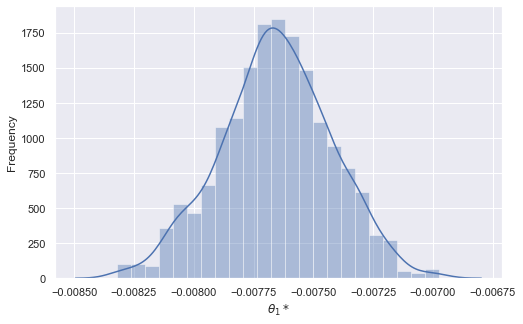

In [79]:
plt.figure(figsize = (8, 5))
sns.distplot(bootstrap_4[:, 1]);
plt.xlabel(r"$\theta_1*$");
plt.ylabel("Frequency");

0 is not in this confidence interval. However, the estimates for the slope on `weight` are all very small. 

Why are they all so small? Does this mean the linear association between `weight` and `mpg` is not statistically significant? Answer below.

- Hint: Look closely at the scatter plot at the start of Question 4.

_Type your answer here, replacing this text._

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before     running the cell below, so that all images/graphs appear in the output. The cell below will generate     a zipfile for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)